<a href="https://colab.research.google.com/github/alireza-data/Sport-Activities/blob/main/Activity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


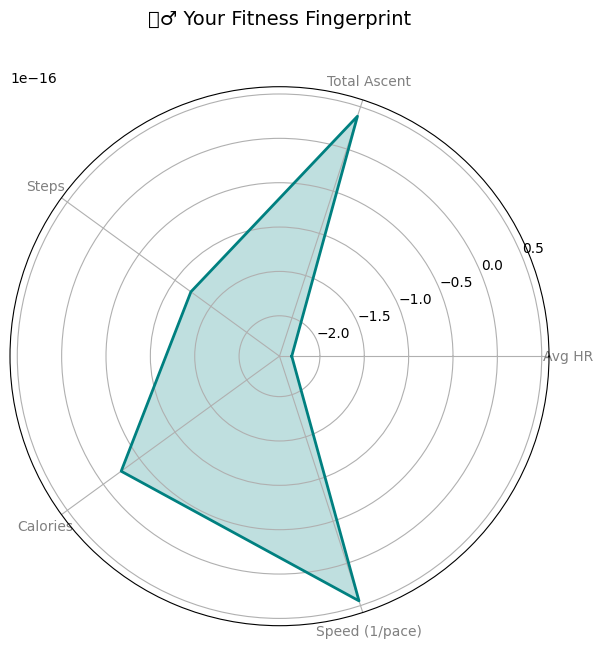


📊 RADAR CHART — YOUR FITNESS FINGERPRINT
Each axis represents one normalized training metric:
- Avg HR: cardiovascular intensity
- Total Ascent: elevation challenge
- Steps: total activity volume
- Calories: overall energy output
- Speed (1/pace): movement efficiency (higher = faster)

The filled shape shows your *training personality* —
whether you favor endurance, speed, elevation, or balance.



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128034 (\N{TURTLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


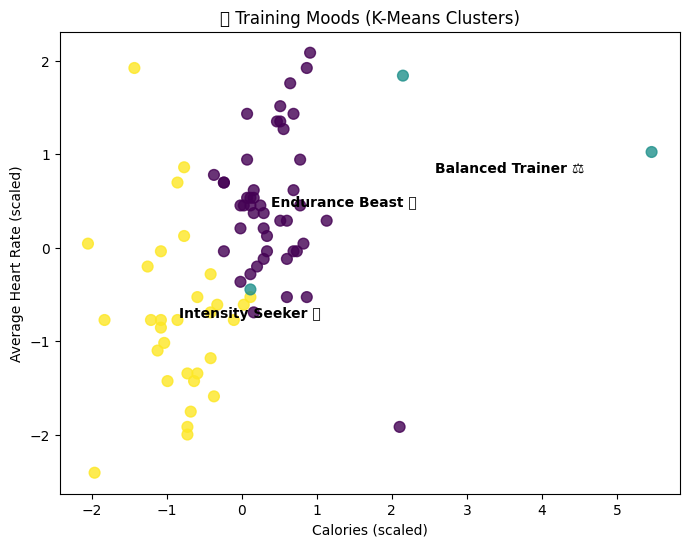


🧭 SCATTER PLOT — TRAINING MOODS
Each dot = one activity.
Color = your training mood (K-Means cluster):

🐢 Endurance Beast — long and steady sessions
⚖️ Balanced Trainer — moderate pace and controlled HR
🔥 Intensity Seeker — short, hard, high-HR workouts

This helps you visualize your distribution of workouts and intensity over time.



In [1]:
# ======================================
# 🏃‍♂️ FITNESS FINGERPRINT & TRAINING MOOD ANALYSIS
# ======================================

# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# 📂 Load dataset from Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# 🧹 Select and clean relevant columns
cols = ['Avg HR', 'Avg Pace', 'Total Ascent', 'Steps', 'Calories']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], np.nan)

# 🕒 Convert Avg Pace (mm:ss) → seconds per km
def pace_to_seconds(pace_str):
    try:
        parts = str(pace_str).split(':')
        if len(parts) == 2:
            return int(parts[0]) * 60 + float(parts[1])
        else:
            return float(pace_str)
    except:
        return np.nan

df['Avg Pace (s/km)'] = df['Avg Pace'].apply(pace_to_seconds)
df = df.drop(columns=['Avg Pace'])

# 🔢 Convert all columns to numeric
for col in ['Avg HR', 'Total Ascent', 'Steps', 'Calories', 'Avg Pace (s/km)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🚫 Drop rows with NaN or Inf
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# 🏃‍♀️ Convert pace to speed (higher = faster)
df['Speed (1/pace)'] = 1 / df['Avg Pace (s/km)']
df = df.drop(columns=['Avg Pace (s/km)'])

# 🌈 Normalize metrics
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

# ==============================
# 🔍 K-MEANS CLUSTERING
# ==============================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Mood Cluster'] = kmeans.fit_predict(df_scaled)

# Assign mood labels
mood_labels = {
    0: "Endurance Beast 🐢",
    1: "Balanced Trainer ⚖️",
    2: "Intensity Seeker 🔥"
}
df_scaled['Mood Label'] = df_scaled['Mood Cluster'].map(mood_labels)

# ==============================
# 🎯 RADAR CHART — Fitness Fingerprint
# ==============================
mean_values = df_scaled.drop(columns=['Mood Cluster', 'Mood Label']).mean().values
categories = list(df_scaled.drop(columns=['Mood Cluster', 'Mood Label']).columns)

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = np.concatenate((mean_values, [mean_values[0]]))

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.plot(angles, values, linewidth=2, linestyle='solid', color='teal')
ax.fill(angles, values, 'teal', alpha=0.25)
plt.title("🏃‍♂️ Your Fitness Fingerprint", size=14, y=1.1)
plt.show()

print("""
📊 RADAR CHART — YOUR FITNESS FINGERPRINT
Each axis represents one normalized training metric:
- Avg HR: cardiovascular intensity
- Total Ascent: elevation challenge
- Steps: total activity volume
- Calories: overall energy output
- Speed (1/pace): movement efficiency (higher = faster)

The filled shape shows your *training personality* —
whether you favor endurance, speed, elevation, or balance.
""")

# ==============================
# 🧭 SCATTER PLOT — Training Moods
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(df_scaled['Calories'], df_scaled['Avg HR'],
            c=df_scaled['Mood Cluster'], cmap='viridis', s=60, alpha=0.8)
plt.title("🧭 Training Moods (K-Means Clusters)")
plt.xlabel("Calories (scaled)")
plt.ylabel("Average Heart Rate (scaled)")  # ✅ Fixed unterminated string

# Label cluster centers with mood names
for mood in df_scaled['Mood Label'].unique():
    subset = df_scaled[df_scaled['Mood Label'] == mood]
    plt.text(subset['Calories'].mean(),
             subset['Avg HR'].mean(),
             mood, fontsize=10, fontweight='bold', color='black')

plt.show()

print("""
🧭 SCATTER PLOT — TRAINING MOODS
Each dot = one activity.
Color = your training mood (K-Means cluster):

🐢 Endurance Beast — long and steady sessions
⚖️ Balanced Trainer — moderate pace and controlled HR
🔥 Intensity Seeker — short, hard, high-HR workouts

This helps you visualize your distribution of workouts and intensity over time.
""")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


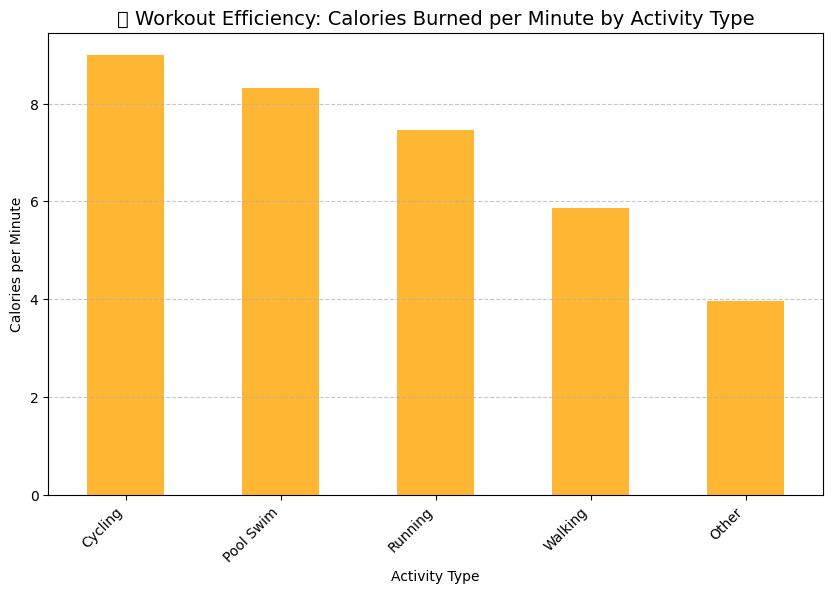


🍫 BAR CHART — EFFORT VS REWARD
Each bar shows the *average calories burned per minute* for each activity type.

- Taller bars = more efficient workouts (higher calories burned per minute)
- Compare your activities: e.g., running vs cycling vs swimming
- Insight: find which activities give you the *most "reward"* for your effort/time invested.



In [2]:
# ======================================
# 🍫 EFFORT VS REWARD — Calories Burned per Minute
# ======================================

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Keep relevant columns
cols = ['Activity Type', 'Calories', 'Time']
df = df[cols].copy()

# Replace invalid entries
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# ----- Convert Calories to numeric -----
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# ----- Convert Time to minutes -----
# Handle hh:mm:ss or mm:ss or seconds
def time_to_minutes(t):
    try:
        t = str(t)
        if ':' in t:
            parts = [float(x) for x in t.split(':')]
            if len(parts) == 3:  # hh:mm:ss
                return parts[0]*60 + parts[1] + parts[2]/60
            elif len(parts) == 2:  # mm:ss
                return parts[0] + parts[1]/60
            else:
                return float(parts[0])/60
        else:
            return float(t)/60  # assume seconds
    except:
        return pd.NA

df['Time (min)'] = df['Time'].apply(time_to_minutes)

# Drop rows with missing or zero time/calories
df = df.dropna(subset=['Calories', 'Time (min)'])
df = df[df['Time (min)'] > 0]

# ----- Calculate Calories per Minute -----
df['Calories per Minute'] = df['Calories'] / df['Time (min)']

# ----- Aggregate by Activity Type -----
efficiency = df.groupby('Activity Type')['Calories per Minute'].mean().sort_values(ascending=False)

# ==============================
# 🍫 Bar Chart Visualization
# ==============================
if len(efficiency) > 0:
    plt.figure(figsize=(10,6))
    efficiency.plot(kind='bar', color='orange', alpha=0.8)
    plt.title("🍫 Workout Efficiency: Calories Burned per Minute by Activity Type", fontsize=14)
    plt.ylabel("Calories per Minute")
    plt.xlabel("Activity Type")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("""
🍫 BAR CHART — EFFORT VS REWARD
Each bar shows the *average calories burned per minute* for each activity type.

- Taller bars = more efficient workouts (higher calories burned per minute)
- Compare your activities: e.g., running vs cycling vs swimming
- Insight: find which activities give you the *most "reward"* for your effort/time invested.
""")
else:
    print("No valid data available to plot. Please check 'Calories' and 'Time' columns.")


🏅 HERO WORKOUTS — Personal Records


,Metric,Value,Date
0,Fastest Pace,0:04 min/km,2022-05-31
1,Max HR,187.0,2020-05-28
2,Longest Distance,20.97 km,2021-05-30
3,Highest Climb,956.0 m,2021-12-23


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


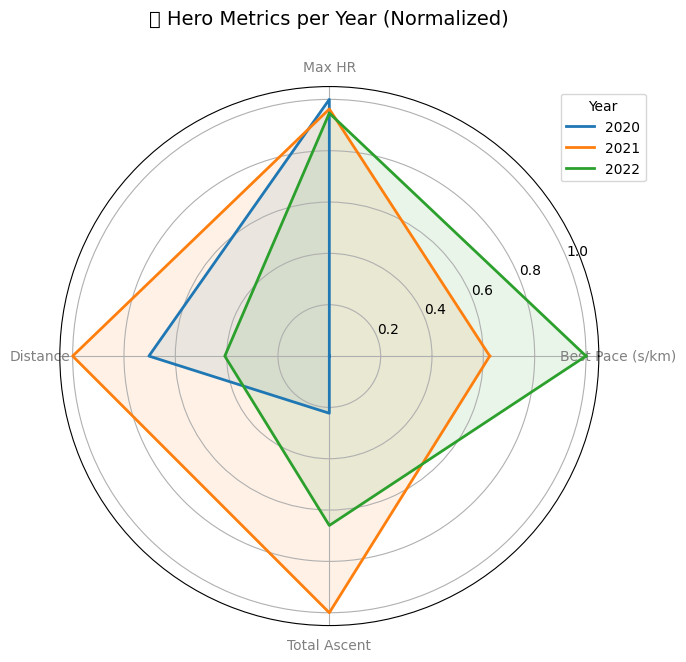


🏆 RADAR CHART — HERO METRICS PER YEAR
Each axis shows one metric (normalized):
- Best Pace: inverted so higher = faster
- Max HR
- Distance
- Total Ascent

Each colored line represents a year. You can see in which years you performed your best in different areas.



In [3]:
# ======================================
# 🏅 HERO WORKOUTS — Personal Records
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Best Pace', 'Max HR', 'Total Ascent', 'Distance']
df = df[cols].copy()

# Replace invalid entries
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert numeric columns
df['Max HR'] = pd.to_numeric(df['Max HR'], errors='coerce')
df['Total Ascent'] = pd.to_numeric(df['Total Ascent'], errors='coerce')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Parse Best Pace (mm:ss) → seconds per km
def pace_to_seconds(pace_str):
    try:
        parts = str(pace_str).split(':')
        if len(parts) == 2:
            return int(parts[0])*60 + float(parts[1])
        elif len(parts) == 3:  # hh:mm:ss
            return int(parts[0])*3600 + int(parts[1])*60 + float(parts[2])
        else:
            return float(parts[0])
    except:
        return np.nan

df['Best Pace (s/km)'] = df['Best Pace'].apply(pace_to_seconds)

# Drop rows with missing data
df = df.dropna(subset=['Best Pace (s/km)', 'Max HR', 'Total Ascent', 'Distance', 'Date'])

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# ----- Find Hero Workouts -----
hero_fastest = df.loc[df['Best Pace (s/km)'].idxmin()]
hero_high_hr = df.loc[df['Max HR'].idxmax()]
hero_longest_distance = df.loc[df['Distance'].idxmax()]
hero_highest_ascent = df.loc[df['Total Ascent'].idxmax()]

# Create a summary table
hero_table = pd.DataFrame({
    'Metric': ['Fastest Pace', 'Max HR', 'Longest Distance', 'Highest Climb'],
    'Value': [
        f"{int(hero_fastest['Best Pace (s/km)']//60)}:{int(hero_fastest['Best Pace (s/km)']%60):02d} min/km",
        hero_high_hr['Max HR'],
        f"{hero_longest_distance['Distance']} km",
        f"{hero_highest_ascent['Total Ascent']} m"
    ],
    'Date': [
        hero_fastest['Date'].date(),
        hero_high_hr['Date'].date(),
        hero_longest_distance['Date'].date(),
        hero_highest_ascent['Date'].date()
    ]
})

print("🏅 HERO WORKOUTS — Personal Records")
display(hero_table)

# ==============================
# 🏆 RADAR CHART — Best Metrics per Year
# ==============================
# Add Year column
df['Year'] = df['Date'].dt.year

# Compute yearly max or min for each metric
yearly_best = df.groupby('Year').agg({
    'Best Pace (s/km)': 'min',   # lower = better
    'Max HR': 'max',
    'Distance': 'max',
    'Total Ascent': 'max'
}).reset_index()

# Normalize for radar chart (0-1 scale)
metrics = ['Best Pace (s/km)', 'Max HR', 'Distance', 'Total Ascent']
yearly_norm = yearly_best.copy()
yearly_norm['Best Pace (s/km)'] = yearly_best['Best Pace (s/km)'].max() - yearly_best['Best Pace (s/km)']  # invert pace
yearly_norm[metrics] = yearly_norm[metrics] / yearly_norm[metrics].max()

# Radar chart setup
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for i, row in yearly_norm.iterrows():
    values = row[categories].values
    values = np.concatenate((values, [values[0]]))  # close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=int(row['Year']))
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.title("🏆 Hero Metrics per Year (Normalized)", size=14, y=1.1)
plt.legend(title="Year", bbox_to_anchor=(1.1, 1))
plt.show()

print("""
🏆 RADAR CHART — HERO METRICS PER YEAR
Each axis shows one metric (normalized):
- Best Pace: inverted so higher = faster
- Max HR
- Distance
- Total Ascent

Each colored line represents a year. You can see in which years you performed your best in different areas.
""")


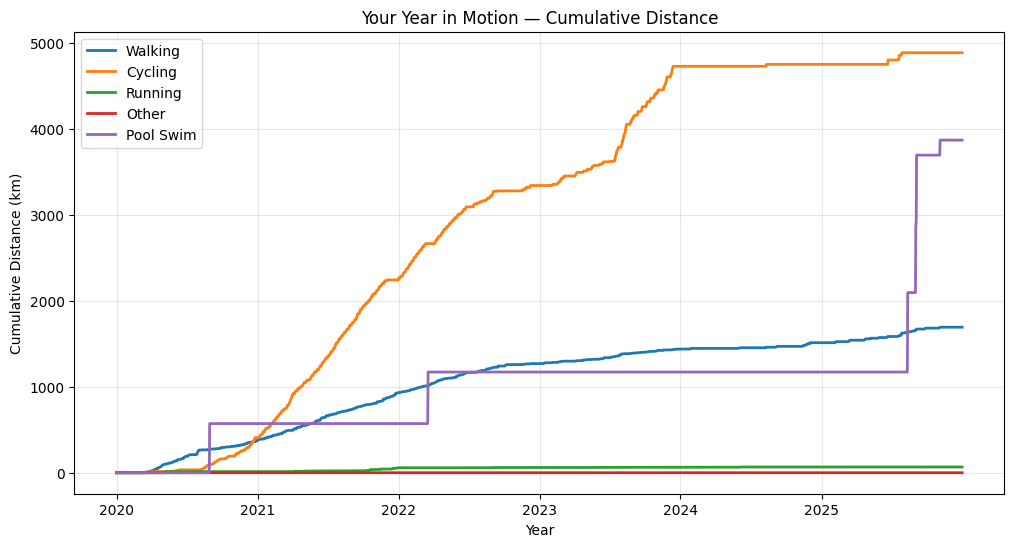

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Distance', 'Activity Type']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA).dropna(subset=['Date', 'Distance', 'Activity Type'])

# Convert numeric and datetime
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Distance', 'Date'])
df = df.sort_values('Date')

# Activity types
activity_types = df['Activity Type'].unique()

# Create a full date range covering 2020–2025
date_range = pd.date_range(start='2020-01-01', end='2025-12-31')

# Compute cumulative distance per activity type
cumulative_df = pd.DataFrame(index=date_range)
for act in activity_types:
    act_cumsum = df[df['Activity Type'] == act].groupby('Date')['Distance'].sum().cumsum()
    cumulative_df[act] = act_cumsum.reindex(date_range, method='ffill').fillna(0)

# Plot static graph
plt.figure(figsize=(12,6))
for act in activity_types:
    plt.plot(date_range, cumulative_df[act], label=act, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Cumulative Distance (km)')
plt.title('Your Year in Motion — Cumulative Distance')
plt.legend()
plt.grid(alpha=0.3)

# Set X-axis ticks explicitly for years 2020–2025
years = pd.date_range(start='2020-01-01', end='2025-01-01', freq='YS')
plt.xticks(years, [str(y.year) for y in years])

plt.show()


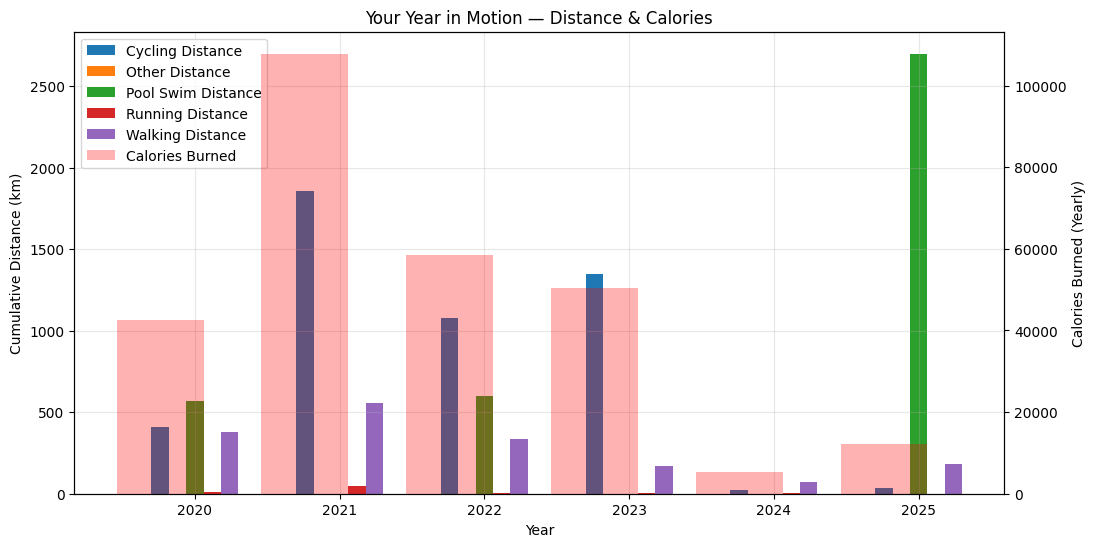

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Date', 'Distance', 'Calories', 'Activity Type']
df = df[cols].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA).dropna(subset=['Date', 'Distance', 'Calories', 'Activity Type'])

# Convert numeric and datetime
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Distance', 'Calories', 'Date'])
df = df.sort_values('Date')

# Add year column
df['Year'] = df['Date'].dt.year
years = [2020, 2021, 2022, 2023, 2024, 2025]  # ensure all years are included

# Compute cumulative distance per activity type per year
distance_yearly = df.groupby(['Year', 'Activity Type'])['Distance'].sum().unstack(fill_value=0)
distance_yearly = distance_yearly.reindex(years, fill_value=0)

# Compute total calories per year
calories_yearly = df.groupby('Year')['Calories'].sum().reindex(years, fill_value=0)

# Plot setup
fig, ax1 = plt.subplots(figsize=(12,6))

# Set bar width and positions
bar_width = 0.12
x = np.arange(len(years))

# Plot cumulative distance bars (grouped by activity type)
for i, act in enumerate(distance_yearly.columns):
    ax1.bar(x + i*bar_width, distance_yearly[act], width=bar_width, label=f"{act} Distance")

ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Distance (km)')
ax1.set_title('Your Year in Motion — Distance & Calories')
ax1.set_xticks(x + bar_width*(len(distance_yearly.columns)-1)/2)
ax1.set_xticklabels(years)
ax1.grid(alpha=0.3)

# Secondary axis for yearly calories (single bar per year, semi-transparent)
ax2 = ax1.twinx()
ax2.bar(x, calories_yearly.values, width=bar_width*len(distance_yearly.columns),
        color='red', alpha=0.3, label='Calories Burned')
ax2.set_ylabel('Calories Burned (Yearly)')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


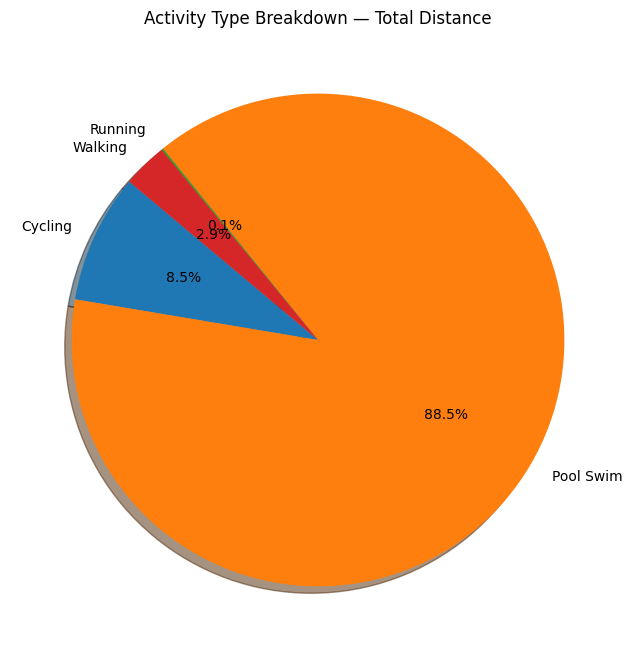

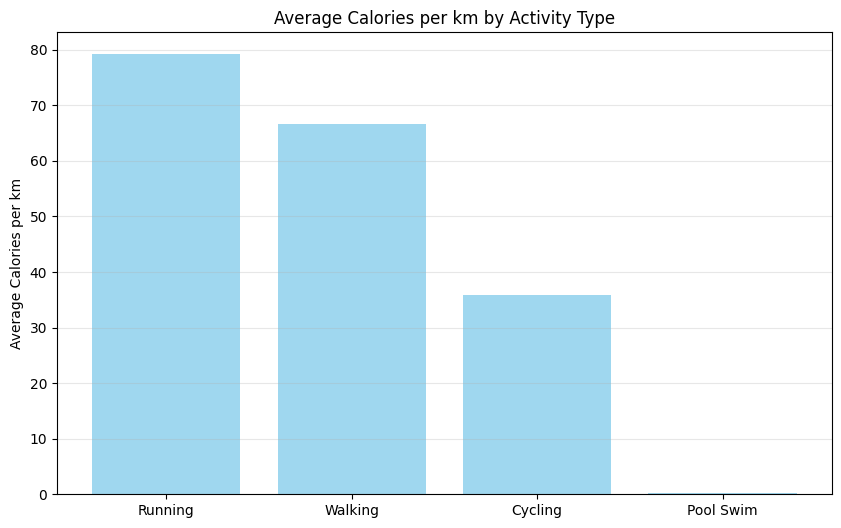

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Activity Type', 'Distance', 'Time', 'Calories']
df = df[cols].copy()

# ------------------------------
# Convert Distance: remove units and convert to float
df['Distance'] = df['Distance'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Convert Time: from "HH:MM:SS" or "MM:SS" to total minutes
def time_to_minutes(t):
    try:
        parts = [float(p) for p in t.split(':')]
        if len(parts) == 3:
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:
            return parts[0] + parts[1]/60
        else:
            return float(parts[0])
    except:
        return np.nan

df['Time'] = df['Time'].astype(str).apply(time_to_minutes)

# Convert Calories: remove non-numeric characters
df['Calories'] = df['Calories'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# Drop invalid or zero rows
df = df.dropna(subset=['Activity Type', 'Distance', 'Time', 'Calories'])
df = df[df['Distance'] > 0]

if df.empty:
    raise ValueError("No valid numeric data found in your CSV. Please check Distance, Time, Calories columns.")

# ------------------------------
# Pie chart: Percentage of total distance per activity type
distance_by_activity = df.groupby('Activity Type')['Distance'].sum()
plt.figure(figsize=(8,8))
plt.pie(distance_by_activity, labels=distance_by_activity.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Activity Type Breakdown — Total Distance')
plt.show()

# ------------------------------
# Bar chart: Average calories per km per activity type
df['Calories_per_km'] = df['Calories'] / df['Distance']
avg_calories_per_km = df.groupby('Activity Type')['Calories_per_km'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_calories_per_km.index, avg_calories_per_km.values, color='skyblue', alpha=0.8)
plt.ylabel('Average Calories per km')
plt.title('Average Calories per km by Activity Type')
plt.grid(axis='y', alpha=0.3)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


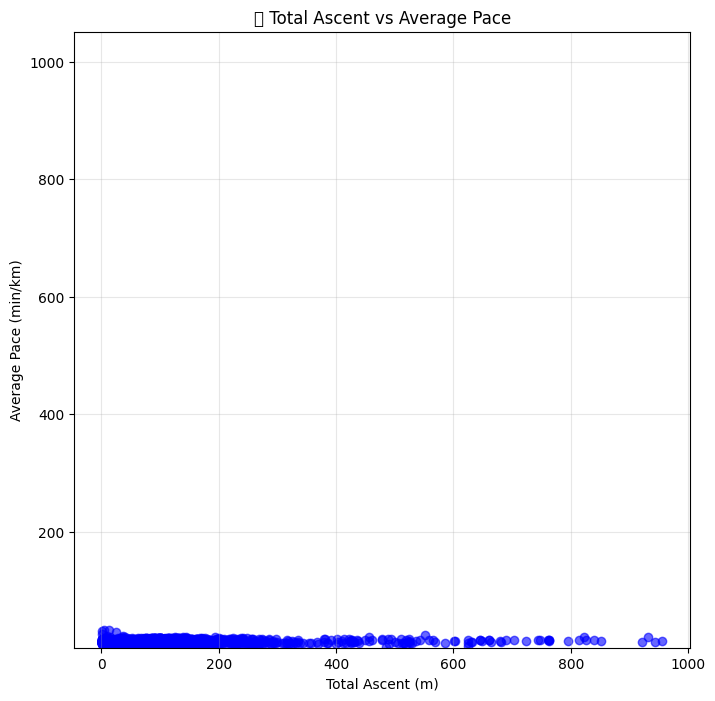

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9968 (\N{MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


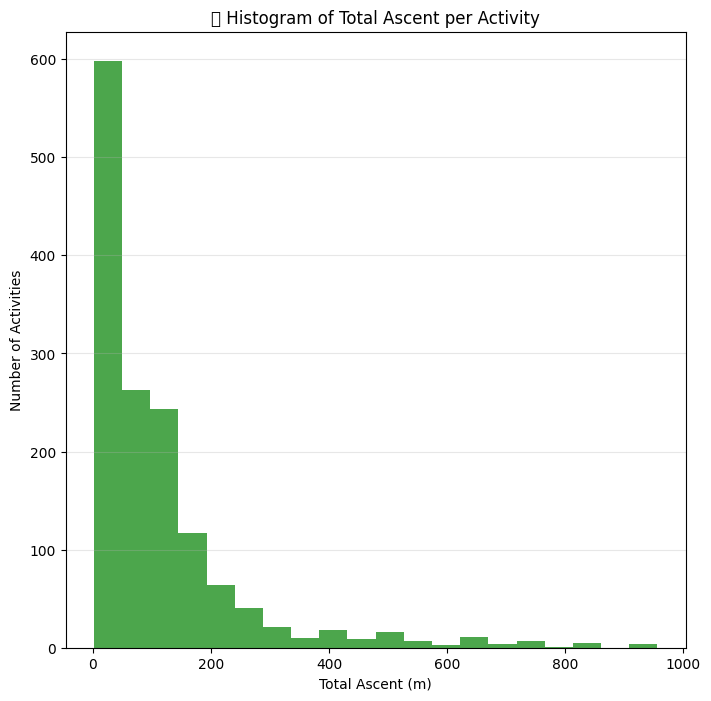

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# Select relevant columns
cols = ['Total Ascent', 'Avg Pace', 'Max Elevation', 'Activity Type', 'Distance']
df = df[cols].copy()

# ------------------------------
# Clean numeric data
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert Avg Pace from "MM:SS" or "HH:MM:SS" to minutes
def pace_to_min(pace_str):
    try:
        parts = [float(p) for p in str(pace_str).split(':')]
        if len(parts) == 3:  # HH:MM:SS
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:  # MM:SS
            return parts[0] + parts[1]/60
        else:  # assume numeric minutes
            return parts[0]
    except:
        return np.nan

df['Avg Pace'] = df['Avg Pace'].apply(pace_to_min)

# Convert other numeric columns
for col in ['Total Ascent', 'Max Elevation']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Total Ascent', 'Avg Pace', 'Max Elevation'])

if df.empty:
    raise ValueError("No valid numeric data for Total Ascent, Avg Pace, or Max Elevation.")

# ------------------------------
# Scatter plot: Total Ascent vs Avg Pace
plt.figure(figsize=(8,8))
plt.scatter(df['Total Ascent'], df['Avg Pace'], c='blue', alpha=0.6)
plt.xlabel('Total Ascent (m)')
plt.ylabel('Average Pace (min/km)')
plt.title('🏔️ Total Ascent vs Average Pace')
plt.grid(alpha=0.3)
plt.axis('square')  # Make graph square
plt.show()

# ------------------------------
# Histogram: Distribution of elevation gains (Total Ascent)
plt.figure(figsize=(8,8))
plt.hist(df['Total Ascent'], bins=20, color='green', alpha=0.7)
plt.xlabel('Total Ascent (m)')
plt.ylabel('Number of Activities')
plt.title('⛰️ Histogram of Total Ascent per Activity')
plt.grid(axis='y', alpha=0.3)
plt.show()


Columns in CSV: ['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Swim Cadence', 'Max Swim Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Training Stress Score®', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate', 'Steps', 'Decompression', 'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']


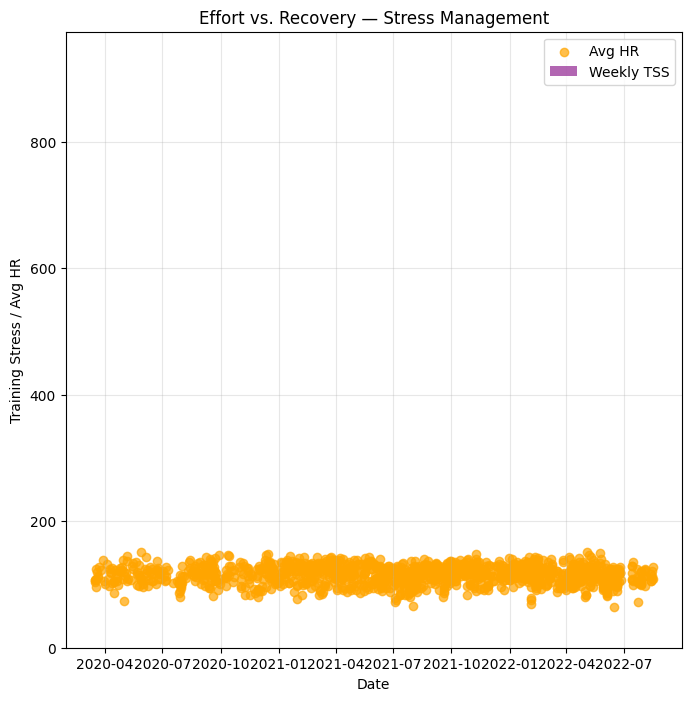

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ------------------------------
# Inspect columns
print("Columns in CSV:", df.columns.tolist())

# Detect Training Stress Score column
tss_col = [c for c in df.columns if 'Training Stress' in c]
if not tss_col:
    raise ValueError("No column found containing 'Training Stress'.")
tss_col = tss_col[0]

# Detect Avg HR column
avg_hr_col = [c for c in df.columns if 'Avg HR' in c or 'Average Heart Rate' in c]
if not avg_hr_col:
    raise ValueError("No column found for Avg HR.")
avg_hr_col = avg_hr_col[0]

# Optional: Steps, Calories, Moving Time
steps_col = [c for c in df.columns if 'Steps' in c]
steps_col = steps_col[0] if steps_col else None
calories_col = [c for c in df.columns if 'Calories' in c]
calories_col = calories_col[0] if calories_col else None
moving_col = [c for c in df.columns if 'Moving Time' in c]
moving_col = moving_col[0] if moving_col else None

# ------------------------------
# Convert numeric columns
for col in [tss_col, avg_hr_col, steps_col, calories_col, moving_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing critical data
df = df.dropna(subset=['Date', tss_col, avg_hr_col])
df = df.sort_values('Date')

if df.empty:
    raise ValueError("No valid data found for Training Stress Score or Avg HR.")

# ------------------------------
# Compute rolling weekly average of Training Stress Score
df.set_index('Date', inplace=True)
weekly_tss = df[tss_col].rolling('7D').mean()

# ------------------------------
# Plot square chart
plt.figure(figsize=(8,8))

# Rolling weekly TSS bars
plt.bar(weekly_tss.index, weekly_tss.values, width=3, color='purple', alpha=0.6, label='Weekly TSS')

# Overlay Avg HR scatter
plt.scatter(df.index, df[avg_hr_col], color='orange', alpha=0.7, label='Avg HR')

plt.xlabel('Date')
plt.ylabel('Training Stress / Avg HR')
plt.title('Effort vs. Recovery — Stress Management')
plt.grid(alpha=0.3)
plt.axis('square')  # Square chart for balanced axes
plt.legend()
plt.show()


/tmp/ipython-input-2210678291.py:90: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


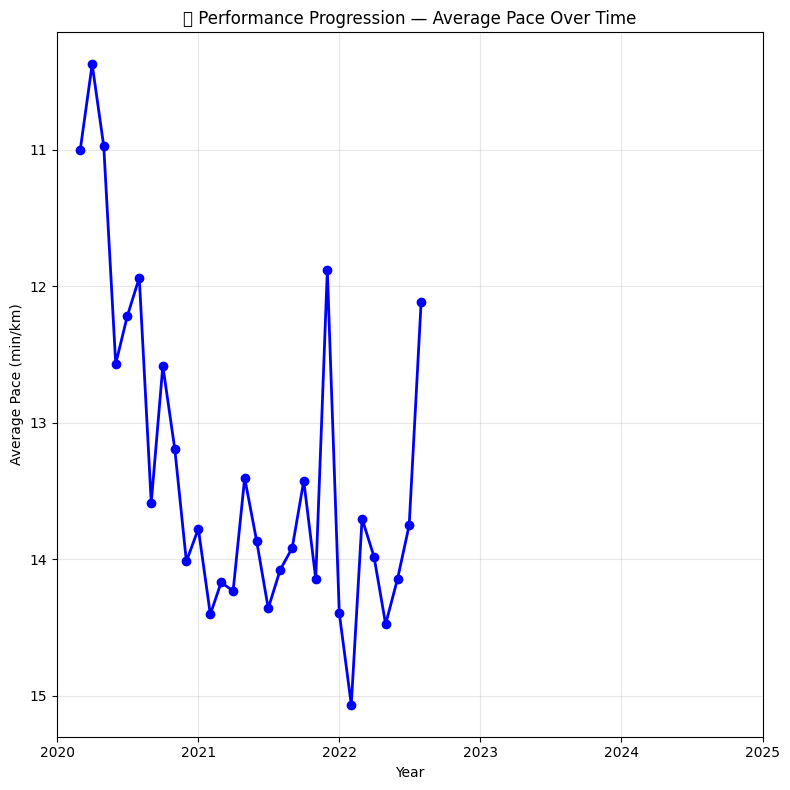

/tmp/ipython-input-2210678291.py:121: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


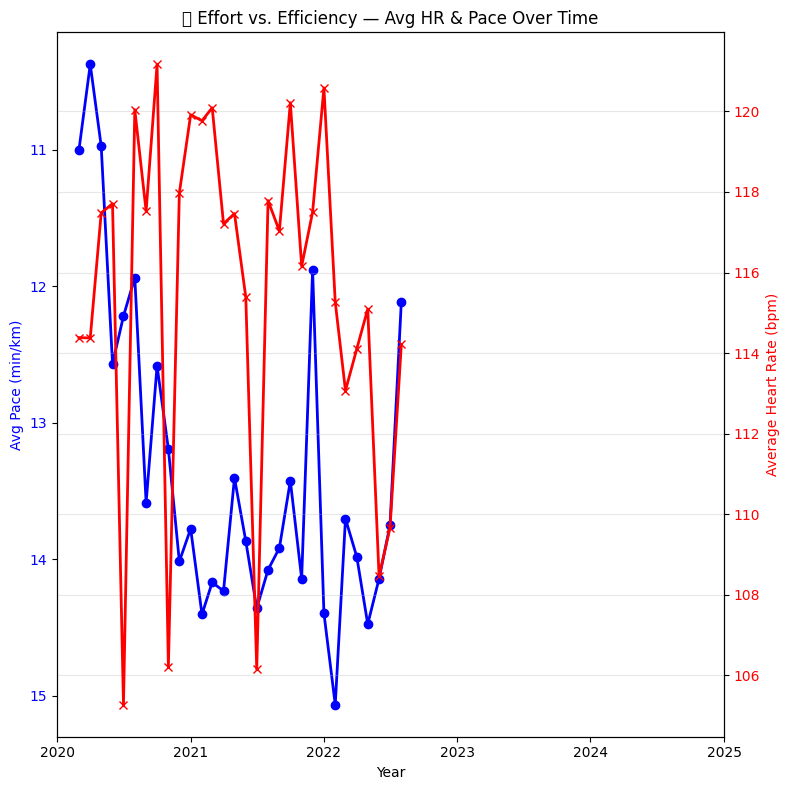

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Load dataset
# ==============================
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ==============================
# Detect relevant columns dynamically
# ==============================
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    return matches[0] if matches else None

date_col = find_col('Date')
avg_pace_col = find_col('Avg Pace')
best_pace_col = find_col('Best Pace')
avg_hr_col = find_col('Avg HR')
ascent_col = find_col('Total Ascent')

if not date_col or not avg_pace_col or not avg_hr_col:
    raise ValueError("Missing required columns. Ensure Date, Avg Pace, and Avg HR exist in your CSV.")

# ==============================
# Clean and convert columns
# ==============================
df = df[[date_col, avg_pace_col, best_pace_col, avg_hr_col, ascent_col]].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

# Convert dates
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Convert Avg Pace and Best Pace to minutes
def pace_to_minutes(pace):
    try:
        parts = [float(p) for p in str(pace).split(':')]
        if len(parts) == 3:  # HH:MM:SS
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:  # MM:SS
            return parts[0] + parts[1]/60
        else:
            return float(pace)
    except:
        return np.nan

df[avg_pace_col] = df[avg_pace_col].apply(pace_to_minutes)
if best_pace_col:
    df[best_pace_col] = df[best_pace_col].apply(pace_to_minutes)

# Convert numeric columns
for col in [avg_hr_col, ascent_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=[date_col, avg_pace_col, avg_hr_col])
df = df.sort_values(date_col)

# ==============================
# Compute monthly averages
# ==============================
df['Month'] = df[date_col].dt.to_period('M')
monthly = df.groupby('Month').agg({
    avg_pace_col: 'mean',
    avg_hr_col: 'mean',
    ascent_col: 'mean'
}).reset_index()

monthly['Month'] = monthly['Month'].dt.to_timestamp()
monthly['Year'] = monthly['Month'].dt.year

# Filter between 2020–2025
monthly = monthly[(monthly['Year'] >= 2020) & (monthly['Year'] <= 2025)]

# ==============================
# Visualization 1: Avg Pace over Time
# ==============================
plt.figure(figsize=(8,8))
plt.plot(monthly['Month'], monthly[avg_pace_col], color='blue', marker='o', linewidth=2)
plt.gca().invert_yaxis()  # Lower pace = better performance
plt.title("📉 Performance Progression — Average Pace Over Time")
plt.xlabel("Year")
plt.ylabel("Average Pace (min/km)")
plt.grid(alpha=0.3)
plt.xticks(pd.date_range('2020-01-01', '2025-12-31', freq='YS'),
           labels=[str(y) for y in range(2020, 2026)])
plt.tight_layout()
plt.show()

# ==============================
# Visualization 2: Dual Axis Chart (Avg HR & Avg Pace)
# ==============================
fig, ax1 = plt.subplots(figsize=(8,8))

# Avg Pace line (blue)
ax1.plot(monthly['Month'], monthly[avg_pace_col], color='blue', marker='o', linewidth=2, label='Avg Pace')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Pace (min/km)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.invert_yaxis()

# Second Y-axis for Avg HR (red)
ax2 = ax1.twinx()
ax2.plot(monthly['Month'], monthly[avg_hr_col], color='red', marker='x', linewidth=2, label='Avg HR')
ax2.set_ylabel('Average Heart Rate (bpm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and formatting
plt.title("🧠 Effort vs. Efficiency — Avg HR & Pace Over Time")
plt.grid(alpha=0.3)

# Year ticks only
ax1.set_xticks(pd.date_range('2020-01-01', '2025-12-31', freq='YS'))
ax1.set_xticklabels([str(y) for y in range(2020, 2026)])

# Fix: avoid 'square' aspect, but keep equal width/height figure
fig.set_size_inches(8, 8)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2309254625.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


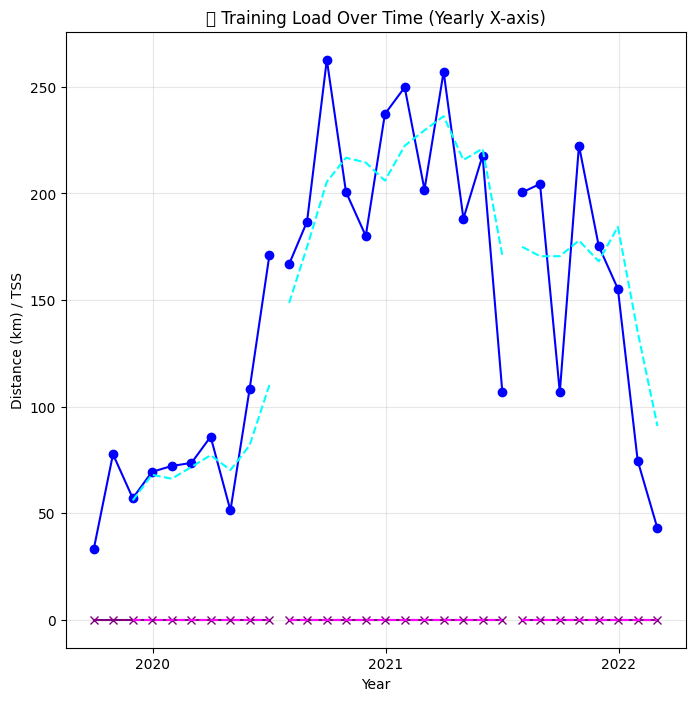

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


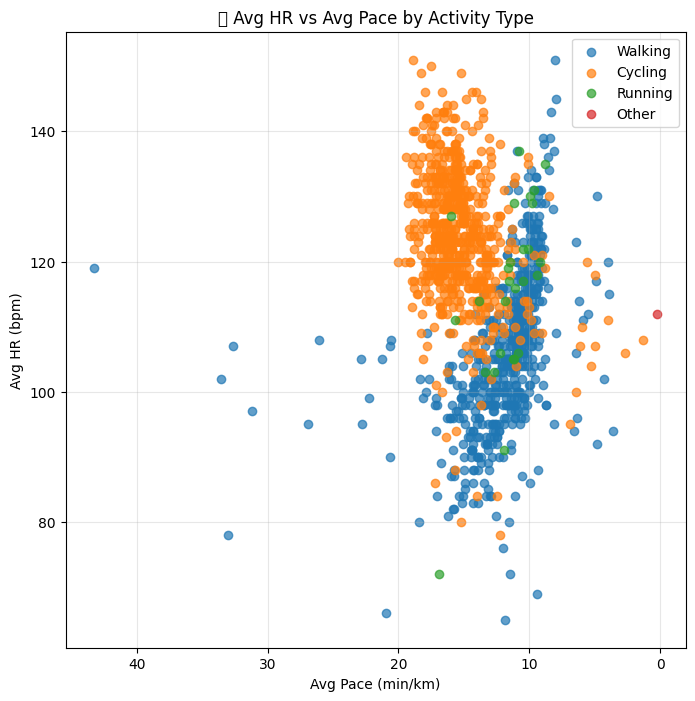

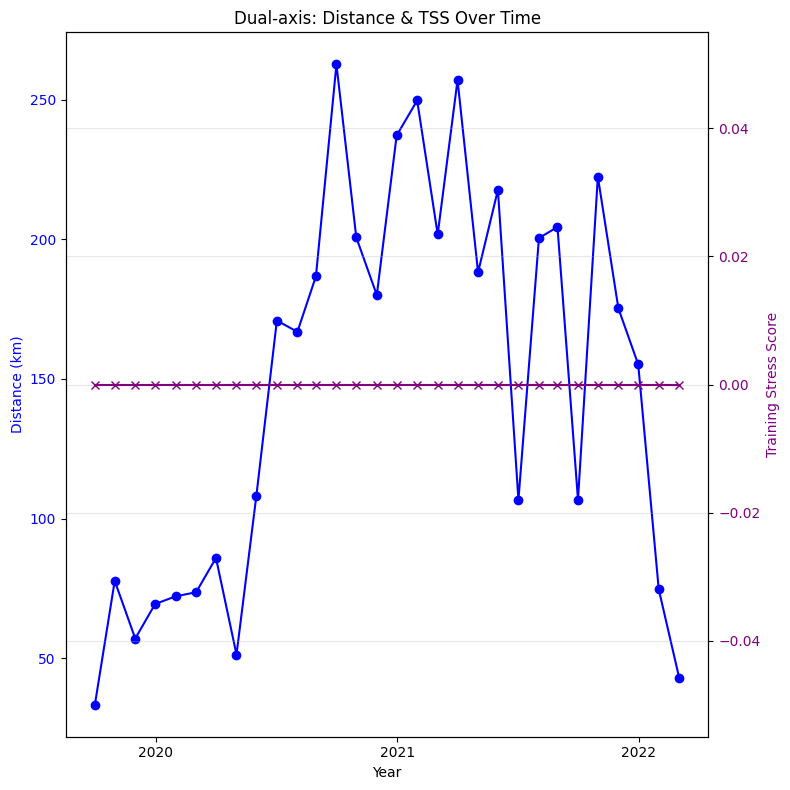

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Load dataset
# ==============================
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# ==============================
# Dynamic column detection
# ==============================
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    return matches[0] if matches else None

date_col = find_col('Date')
distance_col = find_col('Distance')
tss_col = find_col('Training Stress')
avg_hr_col = find_col('Avg HR')
avg_pace_col = find_col('Avg Pace')
activity_type_col = find_col('Activity Type')

# ==============================
# Clean and convert columns
# ==============================
df = df[[date_col, distance_col, tss_col, avg_hr_col, avg_pace_col, activity_type_col]].copy()
df = df.replace(['--', 'NaN', '', ' '], pd.NA)

for col in [distance_col, tss_col, avg_hr_col]:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Avg Pace to minutes
def pace_to_minutes(pace):
    try:
        parts = [float(p) for p in str(pace).split(':')]
        if len(parts) == 3:
            return parts[0]*60 + parts[1] + parts[2]/60
        elif len(parts) == 2:
            return parts[0] + parts[1]/60
        else:
            return float(pace)
    except:
        return np.nan

df[avg_pace_col] = df[avg_pace_col].apply(pace_to_minutes)
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col, distance_col, avg_hr_col])
df = df.sort_values(date_col)

# ==============================
# Monthly aggregation
# ==============================
df.set_index(date_col, inplace=True)
monthly = df.resample('M').agg({
    distance_col: 'sum',
    tss_col: 'sum' if tss_col else 'mean',
    avg_hr_col: 'mean',
    avg_pace_col: 'mean'
}).reset_index()

monthly['Year'] = monthly[date_col].dt.year

# Compute 3-month moving averages
monthly['Distance_MA'] = monthly[distance_col].rolling(3).mean()
if tss_col:
    monthly['TSS_MA'] = monthly[tss_col].rolling(3).mean()

# ==============================
# Visualization 1: Line chart — Distance/TSS over years
# ==============================
plt.figure(figsize=(8,8))
for y in sorted(monthly['Year'].unique()):
    subset = monthly[monthly['Year']==y]
    plt.plot(subset[date_col], subset[distance_col], marker='o', color='blue')
    plt.plot(subset[date_col], subset['Distance_MA'], color='cyan', linestyle='--')

    if tss_col:
        plt.plot(subset[date_col], subset[tss_col], marker='x', color='purple')
        plt.plot(subset[date_col], subset['TSS_MA'], color='magenta', linestyle='--')

plt.title("📈 Training Load Over Time (Yearly X-axis)")
plt.xlabel("Year")
plt.ylabel("Distance (km) / TSS")
plt.grid(alpha=0.3)

# X-axis: one tick per year
years = sorted(monthly['Year'].unique())
plt.xticks(pd.to_datetime([f'{y}-07-01' for y in years]), labels=years)

plt.show()

# ==============================
# Visualization 2: Scatter plot Avg HR vs Avg Pace by Activity Type
# ==============================
plt.figure(figsize=(8,8))
activity_types = df[activity_type_col].dropna().unique() if activity_type_col else ['All']
for act in activity_types:
    subset = df[df[activity_type_col]==act] if activity_type_col else df
    plt.scatter(subset[avg_pace_col], subset[avg_hr_col], alpha=0.7, label=act)

plt.xlabel("Avg Pace (min/km)")
plt.ylabel("Avg HR (bpm)")
plt.title("🧮 Avg HR vs Avg Pace by Activity Type")
plt.gca().invert_xaxis()
plt.grid(alpha=0.3)
plt.gca().set_aspect(aspect='auto')
plt.legend()
plt.show()

# ==============================
# Optional Dual-axis chart (Distance & TSS)
# ==============================
if tss_col:
    fig, ax1 = plt.subplots(figsize=(8,8))
    ax1.plot(monthly[date_col], monthly[distance_col], color='blue', marker='o', label='Distance')
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Distance (km)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(monthly[date_col], monthly[tss_col], color='purple', marker='x', label='TSS')
    ax2.set_ylabel("Training Stress Score", color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')

    plt.title("Dual-axis: Distance & TSS Over Time")
    plt.grid(alpha=0.3)

    # X-axis: only years
    ax1.set_xticks(pd.to_datetime([f'{y}-07-01' for y in years]))
    ax1.set_xticklabels(years)

    fig.set_size_inches(8,8)
    fig.tight_layout()
    plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3993087290.py:16: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+\.?\d*)')[0]
/tmp/ipython-input-3993087290.py:73: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


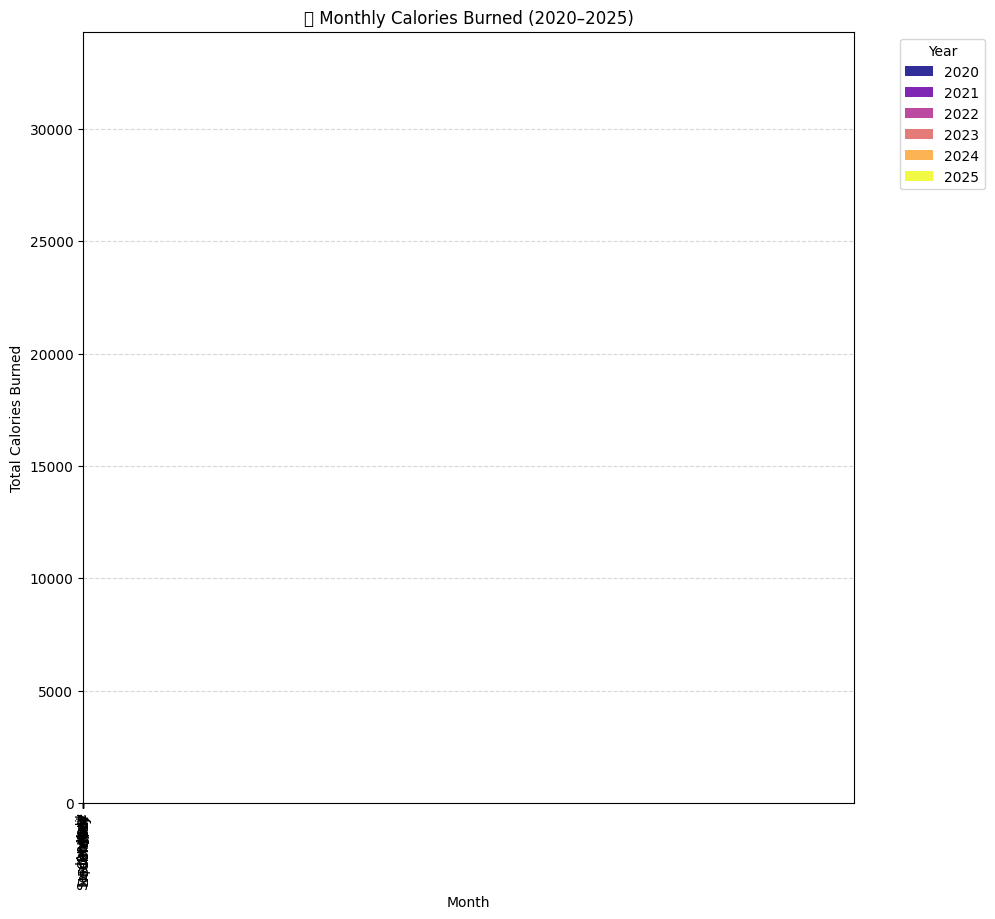

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load Dataset ===
path = "/content/drive/MyDrive/Colab Notebooks/Sport Activities/Activities.csv"
df = pd.read_csv(path)

# === Data Cleaning ===
# Convert Date and Calories safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Calories'] = (
    df['Calories']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.extract('(\d+\.?\d*)')[0]
    .astype(float)
)

# Drop invalid rows
df = df.dropna(subset=['Date', 'Calories'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Keep only years 2020–2025
df = df[df['Year'].between(2020, 2025)]

# Check if valid data remains
if df.empty:
    raise ValueError("No valid data found after cleaning. Check the Calories and Date columns.")

# === Aggregate Monthly Calories per Year ===
monthly_calories = (
    df.groupby(['Month', 'Year'])['Calories']
    .sum()
    .reset_index()
)

# Define month order for correct sorting
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_calories['Month'] = pd.Categorical(monthly_calories['Month'], categories=month_order, ordered=True)
monthly_calories = monthly_calories.sort_values(['Month', 'Year'])

# === Pivot for stacked bar chart ===
pivot_data = monthly_calories.pivot(index='Month', columns='Year', values='Calories').fillna(0)

# Ensure we have at least some data
if pivot_data.sum().sum() == 0:
    raise ValueError("All calorie values are zero after cleaning — check your dataset format.")

# === Plot the stacked bar chart ===
plt.figure(figsize=(10,10))  # Square chart

pivot_data.plot(
    kind='bar',
    stacked=True,
    colormap='plasma',
    alpha=0.85,
    ax=plt.gca()
)

plt.xlabel("Month")
plt.ylabel("Total Calories Burned")
plt.title("🔥 Monthly Calories Burned (2020–2025)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axis('square')
plt.tight_layout()
plt.show()
